# Install libraries

In [1]:
# !pip install transformers datasets -q -U

# Exploring 🤗 Datasets

In [2]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"Total datasets: {len(all_datasets)}")
print(f"First 10 datasets: {all_datasets[:10]}")

/home/ossamaak0/miniconda3/envs/main/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_8322/1955101091.py:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


Total datasets: 138952
First 10 datasets: ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


## Emotion Dataset

In [3]:
from datasets import load_dataset

emotions = load_dataset("emotion")

/home/ossamaak0/miniconda3/envs/main/lib/python3.11/site-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions["train"]
print(f"length of train dataset: {len(train_ds)}")
print(f"train_ds: {train_ds}")
print(f"train_ds.features:{train_ds.features}")

length of train dataset: 16000
train_ds: Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
train_ds.features:{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [6]:
print(f"train_ds[:5]: {train_ds[:5]}")

train_ds[:5]: {'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


## Using Pandas

In [7]:
import pandas as pd

emotions.set_format(type="pandas")
train_df = emotions["train"][:]
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
# get label names using train_ds.features["label"].int2str method
train_df["label_name"] = train_df["label"].apply(
    lambda x: train_ds.features["label"].int2str(x)
)
train_df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Emotion Dataset Visualizations

<BarContainer object of 6 artists>

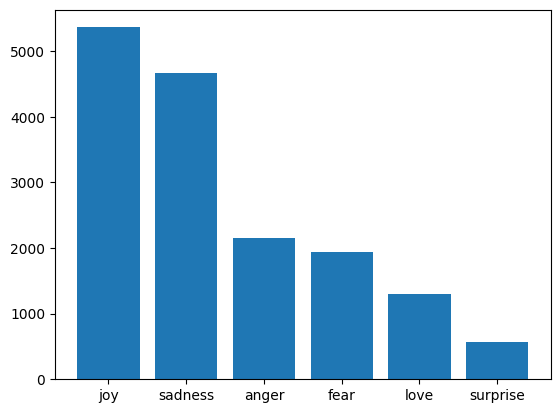

In [9]:
import matplotlib.pyplot as plt

value_counts = train_df["label_name"].value_counts()
plt.bar(value_counts.index, value_counts.values)

Text(0.5, 0, '')

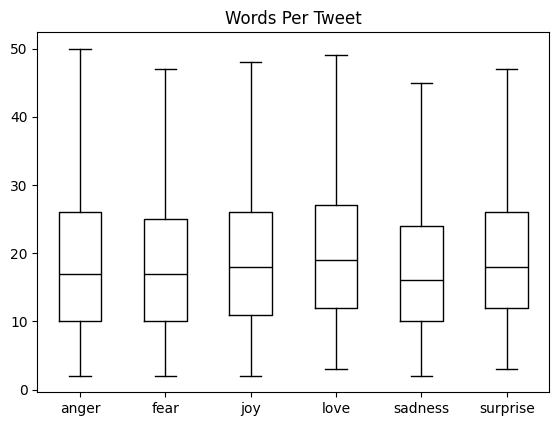

In [10]:
import seaborn as sns

train_df["Words Per Tweet"] = train_df["text"].str.split().apply(len)
train_df.boxplot(
    "Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black"
)
plt.suptitle("")
plt.xlabel("")

In [11]:
# reset format, we no longer need pandas format
emotions.reset_format()

# Tokenization

In [12]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
print(f"Vocab Size: {tokenizer.vocab_size}")
print(f"Max Length: {tokenizer.model_max_length}")
print(f"Model input names: {tokenizer.model_input_names}")

Vocab Size: 30522
Max Length: 1000000000000000019884624838656
Model input names: ['input_ids', 'attention_mask']


In [13]:
text = "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [14]:
# define processing function
def tokenize(batch):
    return tokenizer(batch["text"], padding=True)

In [15]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


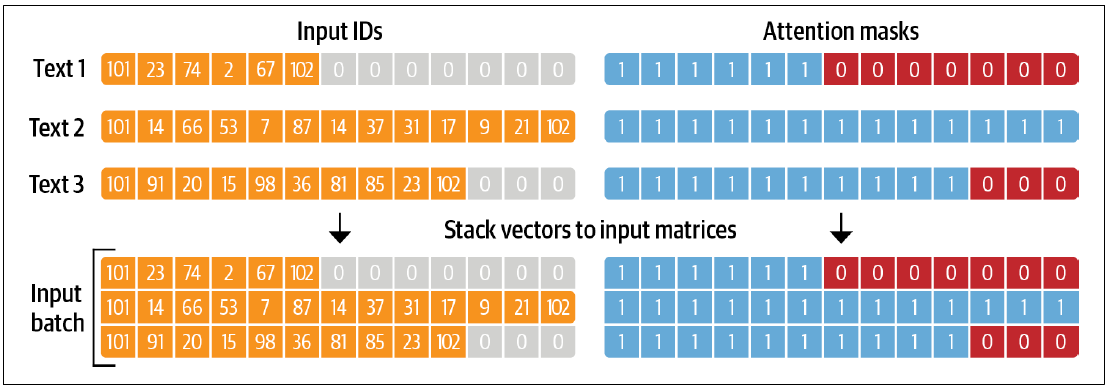

In [16]:
# tokenize the whole dataset
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map: 100%|██████████| 2000/2000 [00:00<00:00, 31297.74 examples/s]


In [17]:
print(f"column_names: {emotions_encoded['train'].column_names}")
print(f"attention_mask: {emotions_encoded['train'][2]['attention_mask']}")

column_names: ['text', 'label', 'input_ids', 'attention_mask']
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Training the Classifier

## 1. Feature Extraction (Freezing Transformer Weights)

In [18]:
import torch
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

### Running the model

In [19]:
text = "this is a test"
# return_tensors = "pt" retrurns them as pytorch tensor
inputs = tokenizer(text, return_tensors="pt")
print(inputs)
print(f"Input tensor shape: {inputs['input_ids'].size()}")

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
Input tensor shape: torch.Size([1, 6])


In [20]:
# move tokens to GPU
inputs = {k: v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)
print(f"output shape: {outputs.last_hidden_state.shape}")

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)
output shape: torch.Size([1, 6, 768])


For classification tasks, it is common practice to just use
the hidden state associated with the `[CLS]` token as the *input feature*. Since this token
appears at the start of each sequence

In [21]:
outputs.last_hidden_state[:, 0]

tensor([[-1.5651e-01, -1.8620e-01,  5.2777e-02, -1.0634e-01, -1.3163e-02,
         -2.6944e-01,  9.2270e-02,  1.5865e-01, -9.8675e-02, -2.9572e-01,
         -1.3788e-01, -3.8061e-02, -5.3617e-02,  1.3045e-01,  3.9713e-02,
          8.6893e-02,  2.5087e-02,  8.6177e-03,  2.5243e-01, -1.3678e-01,
         -1.2137e-01, -1.3896e-01, -1.3426e-01, -9.0844e-02,  3.0509e-02,
         -3.8619e-02,  1.1485e-01, -5.7996e-02,  1.0131e-01,  9.7920e-02,
          3.8743e-03,  1.1950e-01, -6.6339e-02, -2.1257e-02,  1.3090e-01,
          2.6520e-02,  2.3624e-01,  5.0220e-02,  1.3503e-02, -2.1380e-02,
         -8.8323e-02, -9.8360e-02,  2.2675e-01, -2.4940e-02, -1.6261e-01,
         -8.3787e-02, -1.9629e+00, -1.4541e-01, -1.5582e-01, -3.5487e-01,
         -4.5971e-02,  2.0034e-01,  1.3080e-02,  4.9650e-01,  1.0587e-01,
          1.2080e-01, -1.9118e-01,  3.8280e-01,  1.7121e-02, -1.6628e-02,
          2.1525e-01,  4.4381e-02,  3.9334e-03,  3.5416e-02,  1.2238e-01,
          2.1459e-01,  1.5015e-02,  2.

### Combine into a single function

In [22]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {
        k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names
    }
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

### Prepare inputs

In [23]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map: 100%|██████████| 2000/2000 [00:03<00:00, 511.05 examples/s]


In [24]:
# it addeed a new column
emotions_hidden.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
 'validation': ['text',
  'label',
  'input_ids',
  'attention_mask',
  'hidden_state'],
 'test': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']}

In [25]:
emotions_hidden["train"]["hidden_state"].shape

torch.Size([16000, 768])

### Create a feature matrix

In [26]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

### Visualizing Training set

In [27]:
from umap.umap_ import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.199675,5.952629,0
1,-3.048877,5.068658,0
2,5.408230,2.558794,3
3,-2.402888,3.149569,2
4,-3.414587,3.083862,3


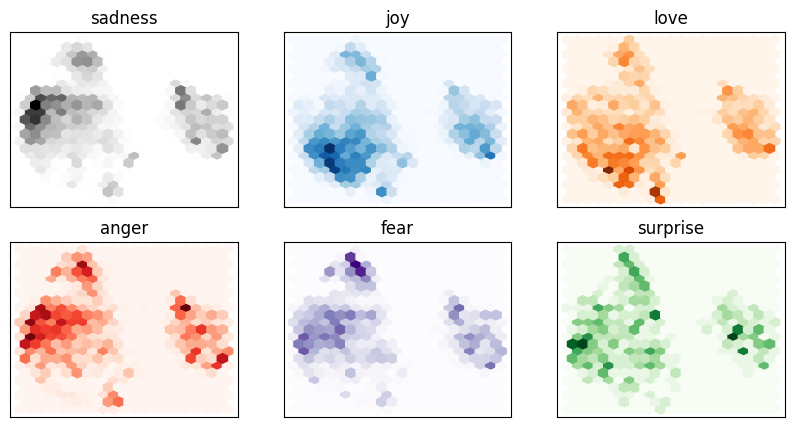

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()
# define cmaps
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
# get label names
labels = emotions["train"].features["label"].names
# visualize all rows in hexbin
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df = df_emb[df_emb["label"] == i]
    ax = axes[i]
    ax.hexbin(df["X"], df["Y"], cmap=cmap, gridsize=20)
    ax.set_title(label)
    ax.set_xticks([])
    ax.set_yticks([])

### Training a simple logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6345

In [30]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [31]:
sample_text = "I said go out now or I will punsih you and beat you"
inputs = tokenizer(sample_text, return_tensors="pt")
output = extract_hidden_states(inputs)
features = np.array(output["hidden_state"])
predicted_label = lr_clf.predict(features)
print(f"Predicted label: {labels[predicted_label[0]]}")

probs = lr_clf.predict_proba(features)
probs = {label: prob for label, prob in zip(labels, probs[0])}
# sort probabilities
probs = dict(sorted(probs.items(), key=lambda x: x[1], reverse=True))
print(probs)

Predicted label: anger
{'anger': 0.8510976580327935, 'sadness': 0.12459917038383145, 'joy': 0.01623658824037821, 'fear': 0.007604106209744391, 'love': 0.0004490752263205941, 'surprise': 1.3401906931841565e-05}


In [32]:
# compare it with a dummy classifier
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

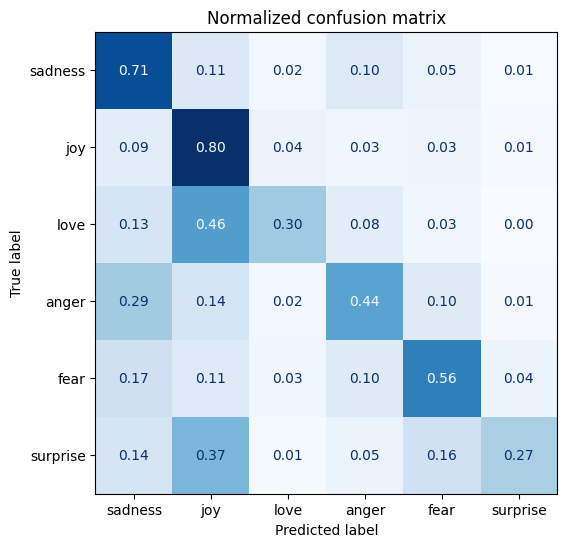

In [33]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()


y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## 2.Fine tuning The transformer

In [34]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(
    model_ckpt, num_labels=num_labels
).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Define metrics

In [35]:
from sklearn.metrics import accuracy_score, f1_score


def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [37]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    report_to="none",
    log_level="error",
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.819600,0.300718,0.913500,0.911955


KeyboardInterrupt: 

### Evaluate the model

In [ ]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

# Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy


def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {
        k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names
    }
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [ ]:
# apply this function
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16
)

In [ ]:
# create dataset with text, losses, predicted and actual labels
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
label_int2str = train_ds.features["label"].int2str
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)